In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.ticker as ticker

pd.options.mode.chained_assignment = None  # default='warn'

from result_parser import parse_dir, parse_file

INPUT_FILE=None
INPUT_PATH=None

# Control selection on the type of test that was run, e.g. both == simultaneous flows
#TYPE=["both"]
TYPE=["cubic","bbr2"]

# BOST 10G results
INPUT_PATH="RESULTS/bbr2/20210802_bost_10g"
INPUT_FILE="data/20210802_bost_10g.dat"
# BOST 40G results
#INPUT_PATH="RESULTS/bbr2/20210803_bost_40g"
#INPUT_FILE="data/20210803_bost_40g.dat"

if INPUT_FILE:
    res = parse_file(INPUT_FILE)
elif INPUT_PATH:
    res = parse_dir(INPUT_PATH)
else:
    print("Nothing to read!")
    exit

In [2]:
"""
Uncertainty Coefficients as derived in 
Throughput Analytics of Data Transfer Infrastructures
NS Rao, et. al., 2018
https://www.ornl.gov/publication/throughput-analytics-data-transfer-infrastructures

Disclaimer: The analytics applied here represents active research and should
be used with that context in mind.
"""

"""
Compute two coefficients
theta: throughput
tau: rtt 
num_t: number of rtts
Return: (theta_uc, theta_ucv)
"""
def compute_coefficient(theta, tau, num_t):
    theta_int = np.trapz(x=np.divide(tau, max(tau)), y=np.divide(theta, max(theta)))
    theta_mid = (theta[0] + theta[-1])/(2*max(theta))
    theta_uc = theta_int-theta_mid/2+0.25
    
    theta_v = 0
    for i in range(0, num_t-1):
        theta_v = theta_v + abs(theta[i+1] - theta[i])

    theta_v = (num_t) * (max(theta) - min(theta)) / ((num_t-1)*theta_v) - 1 / (num_t-1)
    theta_ucv = (2*theta_uc+theta_v)/3
    return (theta_uc, theta_ucv)                    

In [3]:
for r in sorted(res, key=lambda x: x[-1]):
    pass
    #print (r)

In [4]:
df = pd.DataFrame(res)
df = df.rename(columns={0: "host", 1: "type", 2: "streams", 3: "cc", 4: "tput", 5: "xmit", 6: "reord", 7: "rtt"})
print (df)

                                   host  type  streams    cc   tput  \
0                          psl01.pic.es  bbr2        1  bbr2  0.280   
1                          psl01.pic.es  bbr2        1  bbr2  0.273   
2                  perfsonar.oshean.org  bbr2        1  bbr2  8.661   
3                  perfsonar.oshean.org  bbr2        1  bbr2  7.237   
4                btw-bw.t1.grid.kiae.ru  bbr2        1  bbr2  0.764   
..                                  ...   ...      ...   ...    ...   
273  perfsonar-latency.grid.surfsara.nl  bbr2       16  bbr2  9.656   
274           pygrid-sonar2.lancs.ac.uk  bbr2       16  bbr2  9.356   
275                    psb.hpc.utfsm.cl  bbr2       32  bbr2  0.364   
276                          tau.ijs.si  bbr2       16  bbr2  9.222   
277               fiona.sce.pennren.net  bbr2       16  bbr2  9.252   

           xmit  reord  rtt  
0    0.00001307      0  117  
1    0.00007575      0  117  
2    0.00027180    300    5  
3    0.00025260    300    5

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
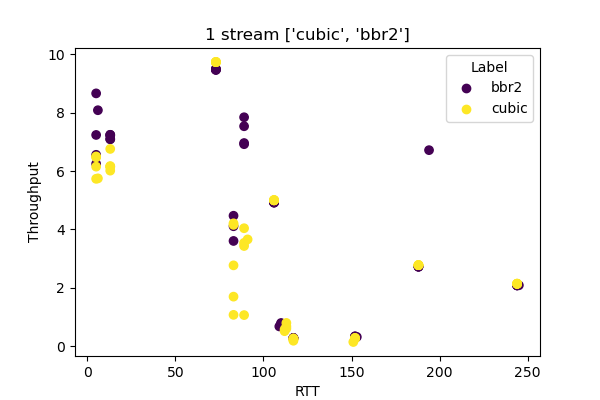

In [5]:
dat = df.loc[(df.streams==1) & df.cc.isin(["bbr2","cubic"]) & df.type.isin(TYPE)]
#stream1.groupby('cc').plot.scatter(x='rtt', y='tput')
# plot groupby results on the same canvas 
fig, ax = plt.subplots(figsize=(6,4))
u, dat["label"] = np.unique(dat.cc, return_inverse=True)
sc = ax.scatter(x = 'rtt', y = 'tput', c = "label", data=dat)

try:
    ax.legend(sc.legend_elements()[0], u, title="Label")
    plt.title(f"1 stream {TYPE}")
    ax.set_xlabel("RTT")
    ax.set_ylabel("Throughput")
    plt.show()
except:
    pass

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
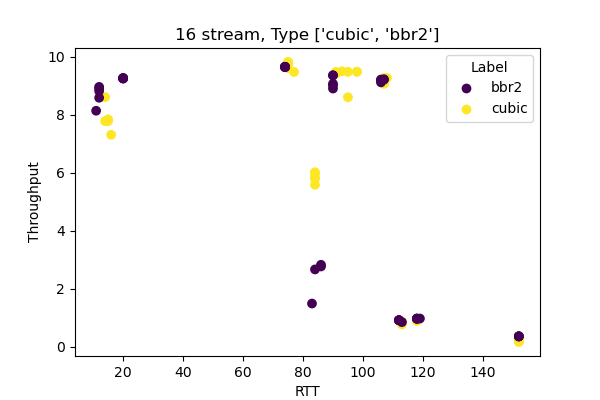

In [6]:
dat = df[(df.streams==16) & df.cc.isin(["bbr2","cubic"]) & df.type.isin(TYPE)]
# plot groupby results on the same canvas 
fig, ax = plt.subplots(figsize=(6,4))
u, dat["label"] = np.unique(dat.cc, return_inverse=True)
sc = ax.scatter(x = 'rtt', y = 'tput', c = "label", data=dat)
ax.legend(sc.legend_elements()[0], u, title="Label")
plt.title(f"16 stream, Type {TYPE}")
ax.set_xlabel("RTT")
ax.set_ylabel("Throughput")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
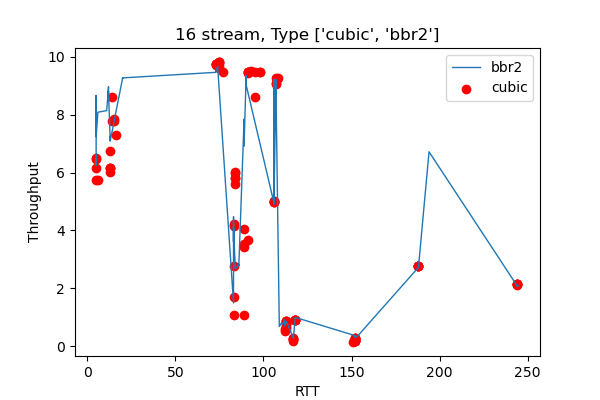

In [7]:
datc = df[df.cc.isin(["cubic"]) & df.type.isin(TYPE)]
datb = df[df.cc.isin(["bbr2"]) & df.type.isin(TYPE)].sort_values(by='rtt')
fig, ax = plt.subplots(figsize=(6,4))
pc = ax.scatter(x = 'rtt', y = 'tput', data=datc, c='red', label="cubic")
pb = ax.plot('rtt', 'tput', data=datb, linewidth=1, label="bbr2")
plt.title(f"16 stream, Type {TYPE}")
ax.set_xlabel("RTT")
ax.set_ylabel("Throughput")
plt.legend()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
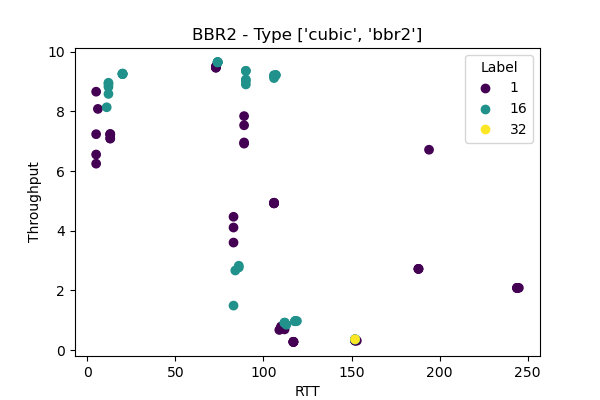

In [8]:
dat = df[df.cc.isin(["bbr2"]) & df.type.isin(TYPE)]
# plot groupby results on the same canvas 
fig, ax = plt.subplots(figsize=(6,4))
u, dat["label"] = np.unique(dat.streams, return_inverse=True)
sc = ax.scatter(x = 'rtt', y = 'tput', c = "label", data=dat)
ax.legend(sc.legend_elements()[0], u, title="Label")
plt.title(f"BBR2 - Type {TYPE}")
ax.set_xlabel("RTT")
ax.set_ylabel("Throughput")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
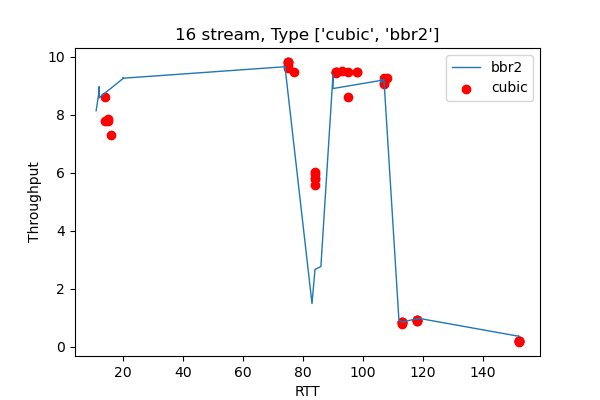

In [9]:
datc = df[(df.streams==16) & df.cc.isin(["cubic"]) & df.type.isin(TYPE)].sort_values(by='rtt')
datb = df[(df.streams==16) & df.cc.isin(["bbr2"]) & df.type.isin(TYPE)].sort_values(by='rtt')
fig, ax = plt.subplots(figsize=(6,4))
pc = ax.scatter(x = 'rtt', y = 'tput', data=datc, c='red', label="cubic")
pb = ax.plot('rtt', 'tput', data=datb, linewidth=1, label="bbr2")
plt.title(f"16 stream, Type {TYPE}")
ax.set_xlabel("RTT")
ax.set_ylabel("Throughput")
plt.legend()
plt.show()

        tput
rtt         
11   8.13900
12   8.82050
20   9.25740
74   9.64900
83   1.49300
84   2.66900
86   2.80000
90   9.14120
106  9.17200
107  9.21800
112  0.91825
113  0.85200
118  0.97125
119  0.97600
152  0.36150
size: 15
bbr2_uc: 0.6313753538681401
bbr2_ucv: 0.5222971010131753


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
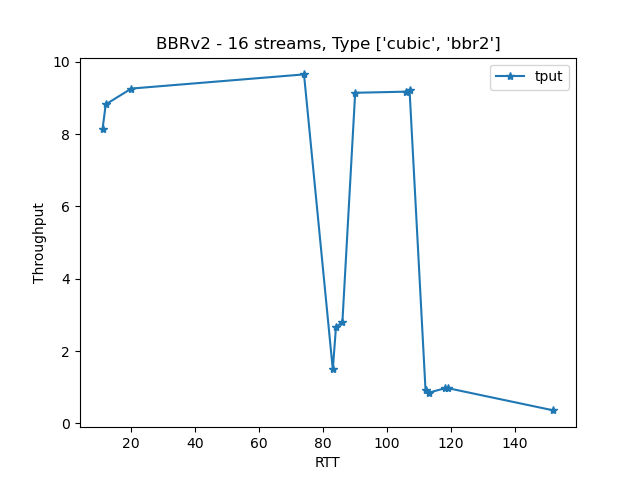

In [10]:
j=1
datb = df[(df.streams==16) & df.cc.isin(["bbr2"]) & df.type.isin(TYPE)].sort_values(by='rtt')
#datb = df[(df.streams==16) & df.cc.isin(["bbr2"])].sort_values(by='rtt')
unique_rtt = np.unique(datb.rtt)
pt = pd.pivot_table(datb, values='tput', index='rtt', aggfunc=np.mean)
print (pt)
print (f"size: {unique_rtt.size}")

uc, ucv = compute_coefficient(pt.tput.values, list(pt.tput.keys()), unique_rtt.size)
print (f"bbr2_uc: {uc}\nbbr2_ucv: {ucv}")

tplt = pt.plot(ylabel="Throughput", xlabel="RTT", title=f"BBRv2 - 16 streams, Type {TYPE}", style="*-")

size: 15
cubic_uc: 0.6096386012394227
cubic_ucv: 0.541412670041149


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
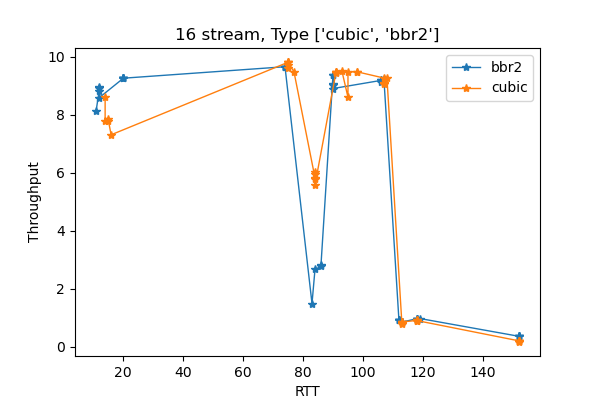

In [11]:
datc = df[(df.streams==16) & df.cc.isin(["cubic"]) & df.type.isin(TYPE)].sort_values(by='rtt')
#datc = df[(df.streams==16) & df.cc.isin(["cubic"])].sort_values(by='rtt')
unique_rtt = np.unique(datc.rtt)
pt = pd.pivot_table(datc, values='tput', index='rtt', aggfunc=np.mean)
#print (pt)
print (f"size: {unique_rtt.size}")

uc, ucv = compute_coefficient(pt.tput.values, list(pt.tput.keys()), unique_rtt.size)
print (f"cubic_uc: {uc}\ncubic_ucv: {ucv}")

fig, ax = plt.subplots(figsize=(6,4))
pb = ax.plot('rtt', 'tput', data=datb, linewidth=1, label="bbr2", marker='*')
pc = ax.plot('rtt', 'tput', data=datc, linewidth=1, label="cubic", marker='*')
plt.title(f"16 stream, Type {TYPE}")
ax.set_xlabel("RTT")
ax.set_ylabel("Throughput")
plt.legend()
plt.show()